## Wrangling Twitter Data for WeRateDogs - Analysis Report
###### By Kaspar Lee

In [1]:
import numpy as np
import pandas as pd

### Analysis and Visualisation

#### Load Data

In [2]:
df_master = pd.read_csv('twitter_archive_master.csv', encoding='utf-8')

#### Analysis

In [3]:
df_master.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,possibly_sensitive,possibly_sensitive_appealable,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,2.110000e+03,2110.000000,2110.0,2110.000000,2110.0,2110.0,2110.000000,1987.000000,1987.000000,1.987000e+03,1.987000e+03
mean,7.364200e+17,10.877725,10.0,8951.123697,0.0,0.0,2829.478199,1.203322,0.594410,1.346351e-01,6.024771e-02
std,6.712639e+16,4.615847,0.0,12173.204907,0.0,0.0,4697.607161,0.561369,0.271988,1.007813e-01,5.096484e-02
min,6.660209e+17,0.000000,10.0,81.000000,0.0,0.0,16.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.766148e+17,10.000000,10.0,2044.000000,0.0,0.0,637.250000,1.000000,0.362880,5.397835e-02,1.608055e-02
50%,7.094295e+17,11.000000,10.0,4176.500000,0.0,0.0,1390.500000,1.000000,0.587830,1.180890e-01,4.947150e-02
75%,7.876377e+17,12.000000,10.0,11406.750000,0.0,0.0,3265.750000,1.000000,0.847139,1.954815e-01,9.164355e-02
max,8.924206e+17,99.000000,10.0,132810.000000,0.0,0.0,79515.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


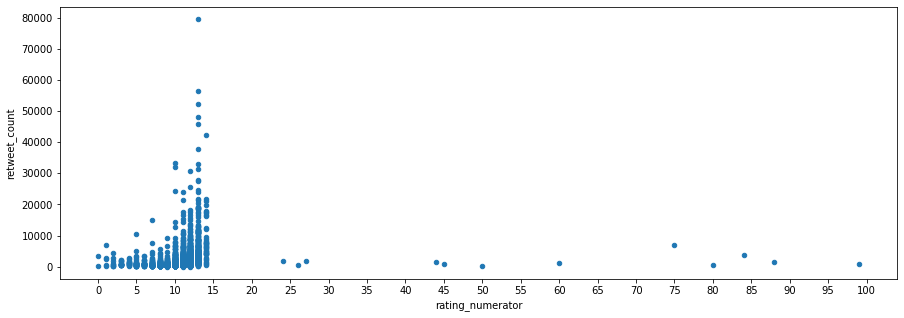

In [4]:
df_master.plot(x='rating_numerator', y='retweet_count', kind='scatter', figsize=(15, 5), xticks=np.arange(0, 101, 5));

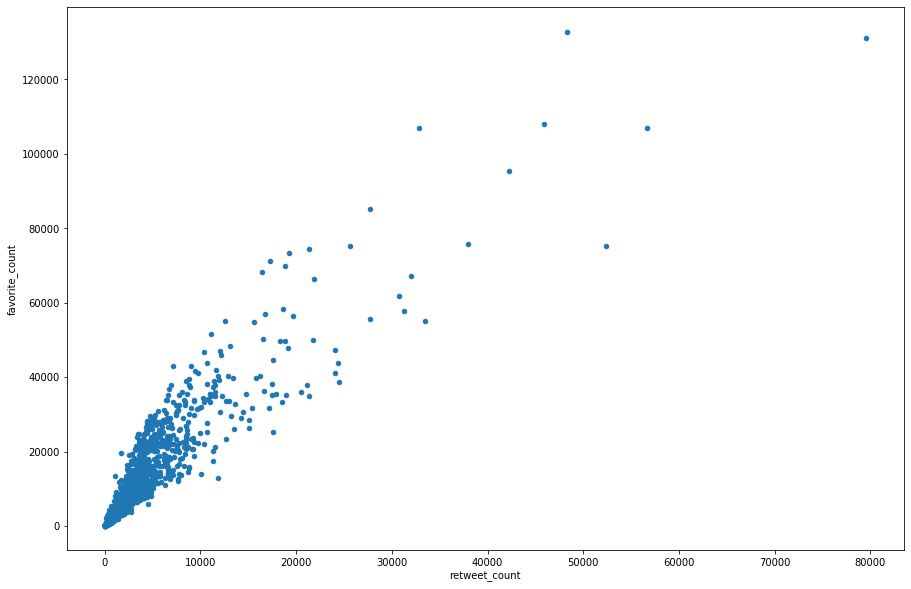

In [5]:
# Retweets and favourites correlation
df_master.plot(x='retweet_count', y='favorite_count', kind='scatter', figsize=(15, 10));

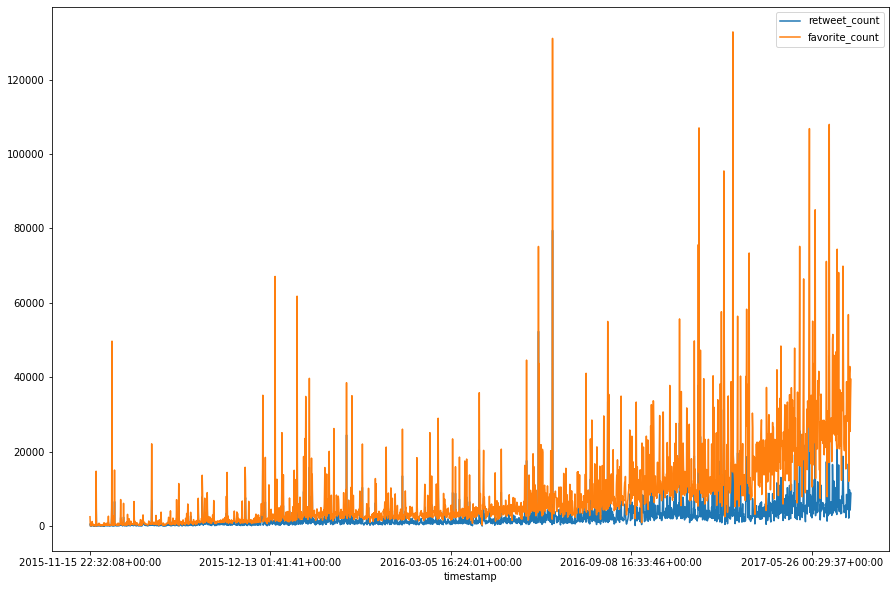

In [6]:
# Retweets and favourites over time
df_master.sort_values('timestamp', axis=0).plot(x='timestamp', y=['retweet_count', 'favorite_count'], figsize=(15, 10));

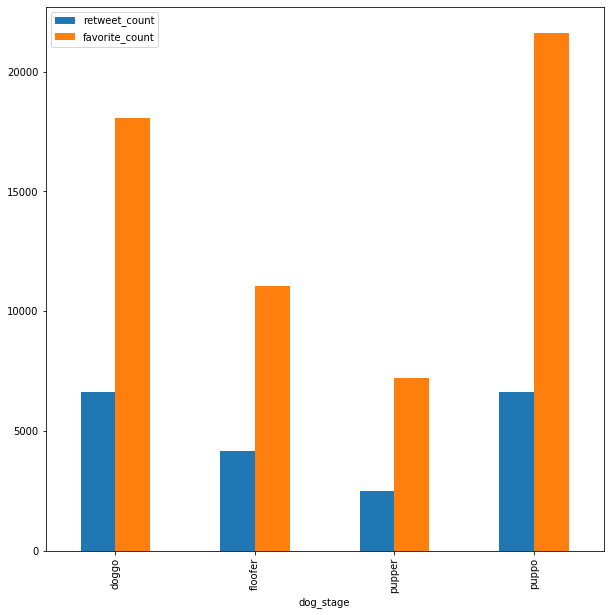

In [7]:
stage_mean_values = df_master.groupby('dog_stage')[['retweet_count', 'favorite_count']].mean()
stage_mean_values.plot.bar(figsize=(10, 10), legend=True);

From this, we can see that the average numerator is 10.9, hence the average dog is rated 10.9/10. The standard deviation is 4.6 however, suggesting that the ratings are relatively spread out from this value.

Next, the scatter plot shows a strong positive correlation between the number of retweets and number of favourites for the tweets, one that we would expect as tweets that are retweeted by a user are also more likely to be favourited, as they likely found some value in the tweet. There is a more dense area for a lower number of retweets and favourites, suggesting that lots of WeRateDogs’s tweets do not get that many retweets/favourites, however a few of their tweets get far more.

Additionally, the rating appears to have a positive correlation with number of retweets, i.e. higher ratings get more retweets. This applies up to a rating of 15/10, values higher we have very few of and they do not appear to follow this trend. This could signify that tweets with higher ratings tend to include images that people like to see and share than tweets with lower ratings.

Next, we can see that over time the retweet count and favourite count has been increasing, with users favouriting tweets more than they rewteet. These values have an extremely wide range however and vary significantly with each tweet.

Finally, the mean number of retweets and favourites grouped by dog stage clearly shows us that *doggo* and *puppo* dogs are liked the most by Twitter users, as they are retweeted and favourited the most often. *floofer* and *pupper* dog stages on average got far fewer favourites and retweets.